# Asset e passività

All'inizio del 2000 abbiamo avuto una crisi dei fondi pensione. Da dicembre 1999 a maggio 2003 siamo passati da una attivo di 239 miliardi a un passivo di 252 miliardi con una spaventosa perdita di circa 500 miliardi.

Cosa è successo? All'inizio del 2000 abbiamo avuto una bolla sul settore tecnologico con una forte contrazione sul mercato azionario, questo ha fatto ridurre gli attivi dei fondi pensionistici che investivano almeno una parte in azionariato.

Ora se fosse stato solo per il mercato azionario questa cosa sarebbe stata brutta, ma la situazione è passata da brutta a spaventosa.
Il taglio dei tassi di interesse ha fatto abbassare anche i rendimenti delle obbligazioni con il conseguente aumento dei debiti di questi fondi.

La gestione di un fondo pensione è simile ad un fondo obbligazionario (il fondo pensione si impegna a restituire il capitale investito più una certa quota di interessi fissi). dunque il taglio dei tassi di interesse ha fatto si che che la passività di questi fondi aumentasse, questa è stata una grave falla nella gestione del rischio. 

Stessa cosa è accaduta nel 2008.

Concludendo nella gestione patrimoniale ciò che conta è la gestione dell'attivo $A_t$ rispetto al debito $P_t$.

$$
F_t = \frac{A_t}{P_t}
$$

Definiamo come surplus o deficit

$$
S_t = A_t - P_t
$$

Se il valore $F_t$ è maggiore di 100 saremo sicuramente capaci di tener testa ai nostri impegni.

## Valore attuale della passività e rapporto di finanziamento

Il nostro principale obiettivo futuro non è quello di aumentare il nostro portafoglio fino a renderlo il più grande possibile.
L'obiettivo e quello di assicurarsi di avere soldi necessari al fine di soddisfare esigenze future.

Cominciamo con l'esaminare il valore delle passività future per farlo dobbiamo attualizzare il valore futuro (scontarle), chiameremo questo valore **Present Value** facciamo un esempio pratico.

Supponiamo di dover pagare fra 5 anni $n$ una somma di 1000€ impostiamola a $FV$, diamo come tasso di interesse il 3% $r$ quanto dovrei avere a disposizione ora?

$$
PV = \frac{FV}{(1+r)^n}
$$

Che a conti fatti danno un present value di circa 863€.<br/>

$$
\frac{1000}{(1+0.03)^5} = 862,60€
$$

Ovviamente i tassi di interessi cambiano nel tempo perciò il calcolo della nostra passività sarà di 

$$
PV(L) = \sum_{i=1}^{k} B(t_i) L_i
$$

Il valore $B(t_i)$ rappresenta il valore delle obbligazioni scontate che valgono un euro al tempo $t_i$, se assumiamo che la curva dei rendimenti è piatta (nessun cambiamento in corso) e il tasso di interesse è $r$ avremo che

$$
B(t_i) = \frac{1}{(1+r)^t}
$$

iniziamo con l'importazione delle librerie e la scrittura della funzione B detto anche sconto

In [1]:
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays $1 at time t where t is in years and r is the annual interest rate
    """
    return (1+r)**(-t)

Calcoliamo ora il prezzo scontato di un euro di una obbligazione a 10 anni con un tasso di interesse al 3%

In [3]:
b = discount(10, .03)
b

0.7440939148967249

Verifichiamo che il codice sia corretto

In [4]:
b*(1.03**10)

1.0

Abbiamo quello che ci serve possiamo scrivere anche la funzione $PV$

In [5]:
def pv(l, r):
    """
    Compute the present value of a list of liabilities given by the time (as an index) and amounts
    """
    dates = l.index
    discounts = discount(dates, r)
    return (discounts*l).sum()

Assumiamo ora di avere 4 debiti di 1, 1.5, 2 e 2.5 Milioni di euro.<br/>
Assumiamo che il primo sia a scadenza di 3 anni e gli altri siano a scadenze di 6 mesi a incrementare.<br/>
Calcoliamo il valore attualizzato dei debiti.

In [6]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])

In [7]:
liabilities.sum()

7.0

In [8]:
pv(liabilities, 0.03)

6.233320315080045

Ora assumiamo di calcolare il rapporto di copertura dei finanziamenti **Founding ratio** basandosi sul valore corrente degli attivi:

In [9]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of a series of liabilities, based on an interest rate and current value of assets
    """
    return assets/pv(liabilities, r)

Supponiamo che il valore in attivo sia pari a 5 e i tassi di interesse siano al 3% i nostro Founding ratio sarà pari a 

In [10]:
funding_ratio(5, liabilities, 0.03)

0.8021407126958777

abbassiamo il tasso di interessa dal 3% al 2%

In [11]:
funding_ratio(5, liabilities, 0.02)

0.7720304366941648

Vediamo che il Rounding ratio si abbassa dal 80% al 77% ora vediamo al variare dell'attivo e dei tassi di interesse come varia il rapporto

In [12]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_funding_ratio(assets, r):
    fr = funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}%')
    
controls = widgets.interactive(show_funding_ratio,
                                   assets=widgets.IntSlider(min=1, max=10, step=1, value=5),
                                   r=(0, .20, .01)
)
display(controls)

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…

## Portafoglio a copertura delle passività

Cosa possiamo fare per proteggere il nostro portafoglio dalla passività possiamo usare [due strategie](https://www.ekonomia.it/2018/05/04/investire-in-base-al-bisogno-liability-driven-investment/):

+ portafoglio a copertura delle passività LHP (Liability-Hedging Investment) pensato per i fondi e le compagnie assicurative
+ portafoglio a copertura degli obiettivi GHP (Goal-Hedging Investment) pensato per investitori individuali non si parla di debiti ma di obiettivi 

Nei portafogli di investitori individuali non si parla di passività bensì di obiettivi, come definiamo l'obiettivo? <br/>
Definiamo questo come un portafoglio che pagherà o fornirà flussi di cassa che corrisponderanno alla data e l'importo del nostro obiettivo/passività.

Facciamo un semplice esempio, siamo un investitore individuale e siamo nel 2018 assuamiamo che andremo in pensione nel 2035.
Ora dal momento che andremo in pensione avremo bisgono di un importo per i successivi 20 anni (mi sto assumendo il rischio di longevità potrei vivere più di 20 anni).

Ora una obbligazione con data di scadenza 2040 non è il nostro investimento migliore in quanto inizierà a pagare le cedole già da subito su base semestrale o annuale, fino alla data di scadenza per poi avere un pagamento. 

Quello che vogliamo è una serie di pagamenti legati alla inflazione, che copra fedelmente il nostro obiettivo.


Andiamo a studiare cosa succede quando i tassi di interesse cambiano nel tempo, utilizzeremo il modello **CIR**.

Iniziamo con il mostrare l'equazione differenziale stocastica.

$$
    dr_t = a(b-r_t)d_t\sigma\sqrt{r_t}dW_t
$$

Questo modello simile al modello precedente del mercato azionario ci dice che i tassi di interesse tendono a mantenere la media sul lungo periodo vicino al valore $b$.

La variabile $a$ rappresenta la velocità media di inversione, mentre $\sqrt{r_t}$ serve per evitare che i tassi scendano sotto lo 0 infatti più $r_t$ si avvicina allo 0 più la sua radice quadrata sarà piccola.

Prima di iniziare analizziamo il tasso di interessa a breve termine e il tasso di interesse annualizzato.

### Tasso di interesse instantaneo e annualizzato

Il tasso di interesse a breve termine è un tasso di interesse instantaneo (ad esempio 1g) come si calcola questo tasso?
Supponiamo di ricevere 1€ con tasso di interesse al 100% a fine anno dovremmo restituire 1€ più gli interessi per un totale di 2€.

Ora supponiamo di pagare gli interessi ogni 6 mesi cioè 50% metà e 50% a fine anno 

In [13]:
1 + 1*0.5 + 1.5*0.5

2.25

Alziamo l'asticella e supponiamo di pagare gli interessi ogni 4 mesi

In [14]:
1 + (1)*.25 + (1 + (1)*.25)*.25 + (1 + (1)*.25 + (1 + (1)*.25)*.25)*.25 + (1 + (1)*.25 + (1 + (1)*.25)*.25 + (1 + (1)*.25 + (1 + (1)*.25)*.25)*.25)*.25

2.44140625

Possiamo portare questi calcoli in formula generale come:

$$\left(1+\frac{r}{N}\right)^N$$

con $r$ tasso di interesse annuale $N$ numero di frazionamenti

In [15]:
(1+1/2)**2

2.25

In [16]:
(1+1/4)**4

2.44140625

In [17]:
(1+1/12)**12

2.613035290224676

Creiamo un grafico con una rateazione che passa da annuale a giornaliera e vediamo il limite della funzione

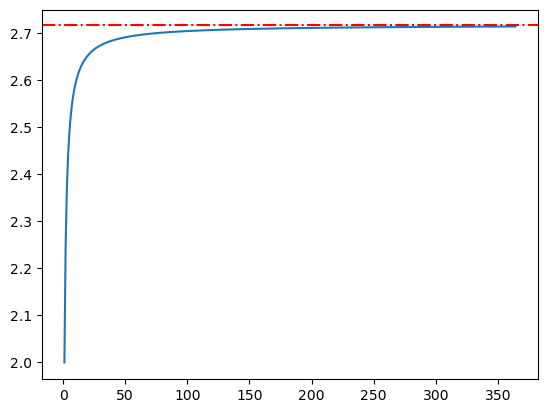

In [18]:
import matplotlib.pyplot as plt


e = np.exp(1)

N = np.arange(1,365)
r = 1
ret = (1 + r/N)**N
plt.plot(N,ret)

plt.axhline(y=e, color='r', linestyle='-.')

Vediamo subito una cosa interessante la serie converge verso $\rm e$.

Da questo possiamo estrarre le seguenti equazioni:

$$
    1 + r_{ann} = {\rm e}^{r_{inst}}
$$




$$
    r_{ann} = {\rm e}^{r_{inst}} - 1
$$

$$
    r_{inst} = ln(1 + r_{ann})
$$

codifichiamo queste equazioni in python

In [19]:
def inst_to_ann(r):
    """
    Convert an instantaneous interest rate to an annual interest rate
    """
    return np.expm1(r)

def ann_to_inst(r):
    """
    Convert an instantaneous interest rate to an annual interest rate
    """
    return np.log1p(r)

In [20]:
ann_to_inst(0.029)

0.028587456851912555

con queste due funzioni possiamo scrivere il nostro modello CIR (Cox-Ingersoll-Ross), questo modello vuole in ingresso il numero di anni della simulazione, quante simulazioni esegure, i parametri del modello browniano , il numero di passi in un anno e il parameto $r_0$ che rappresenta il tasso di interesse di partenza impostato di default a `None`

In [21]:
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t) # just in case of roundoff errors going negative
        
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

<Axes: >

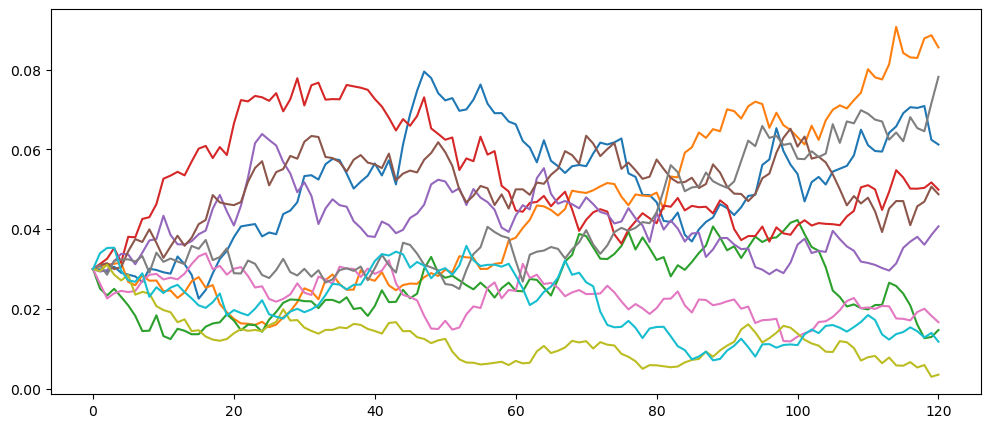

In [22]:
cir(n_scenarios=10).plot(legend=False, figsize=(12,5))

Possiamo anche giocare con i parametri per vedere come si comporta il tasso di interesse

In [23]:
def show_cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios).plot(legend=False, figsize=(12,5))

import ipywidgets as widgets
from IPython.display import display
    
controls = widgets.interactive(show_cir,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

Questo modello ci permette di calcolare il prezzo delle **obbligazioni senza cedole** dette anche zero coupon bond 

$$P(t,T)=A(t,T)e^{-B(t,T)r_{t}}\!$$



dove

$$ A(t,T)=\left({\frac  {2h e^{(a+h)\tau/2}}{2h+(a+h)(e^{\tau h}-1)}}\right)^{{2ab/\sigma ^{2}}} $$
e
$$ B(t,T)={\frac  {2(e^{\tau h}-1)}{2h+(a+h)(e^{\tau h}-1)}} $$
e
$$ h={\sqrt  {a^{2}+2\sigma ^{2}}} $$
e
$$ \tau = T-t $$


Possiamo usare queste equazioni un pochino arzigogolate per calcolare il prezzo di una obbligazione impostiamo $P(t,T)$ come prezzo di una obbligazione al tempo $t$ che matura un capitale al tempo T 

In [24]:
import math
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be the annualized rates, not the short rate
    and the returned values are the annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1/steps_per_year
    num_steps = int(n_years*steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0

    ## For Price Generation
    h = math.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)
    ####

    def price(ttm, r):
        _A = ((2*h*math.exp((h+a)*ttm/2))/(2*h+(h+a)*(math.exp(h*ttm)-1)))**(2*a*b/sigma**2)
        _B = (2*(math.exp(h*ttm)-1))/(2*h + (h+a)*(math.exp(h*ttm)-1))
        _P = _A*np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)
    ####
    
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        # generate prices at time t as well ...
        prices[step] = price(n_years-step*dt, rates[step])

    rates = pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))
    ### for prices
    prices = pd.DataFrame(data=prices, index=range(num_steps))
    ###
    return rates, prices

In [25]:
def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(legend=False, figsize=(12,5))

controls = widgets.interactive(show_cir_prices,
                              r_0 = (0, .15, .01),
                              a = (0, 1, .1),
                               b = (0, .15, .01),
                               sigma= (0, .1, .01),
                               n_scenarios = (1, 100))
display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

Quello che possiamo vedere è che il prezzo di una obbligazione parte da un punto ben definito segue dei percorsi randomici per poi convergere al valore finale.

Vediamo che questa simulazione tende sempre a 1 in quanto rappresenta il nostro capitale finale.

Simuliamo ora l'andamento tra l'investimento in denaro (conto deposito) e l'investimento in obbligazioni, 
Supponiamo di avere un capitale di partenza di 750000€ vogliamo simulare l'andamento dei tassi di interesse dei prossimi 10 anni  
Imposiamo le nostre passività in base al valore delle obbligazioni 

In [26]:
# my starting asset value today aka cash in hand
a_0 = 0.75
# simulate the next 10 years
rates, bond_prices = cir(r_0=0.03, b=0.03, n_scenarios=10)
# liabilities are going to change over time to match the payoff of the ZCB
liabilities = bond_prices
# today's zero coupon bond price is the present value of 1 dollar in 10 years
zc_0 = pv(pd.Series(data=[1], index=[10]), 0.03)
# I can put my money in a zero coupon bond at today's price
n_bonds = a_0/zc_0
# and my asset value will grow based on the bond prices
av_zc_bonds = n_bonds*bond_prices
# how about if I invest in cash? It will grow at some rate of interest
av_cash = a_0*(rates/12+1).cumprod()

Vediamo allora come l'andamento dei tassi di interesse fa cambiare il valore del nostro capilate nei 10 anni 

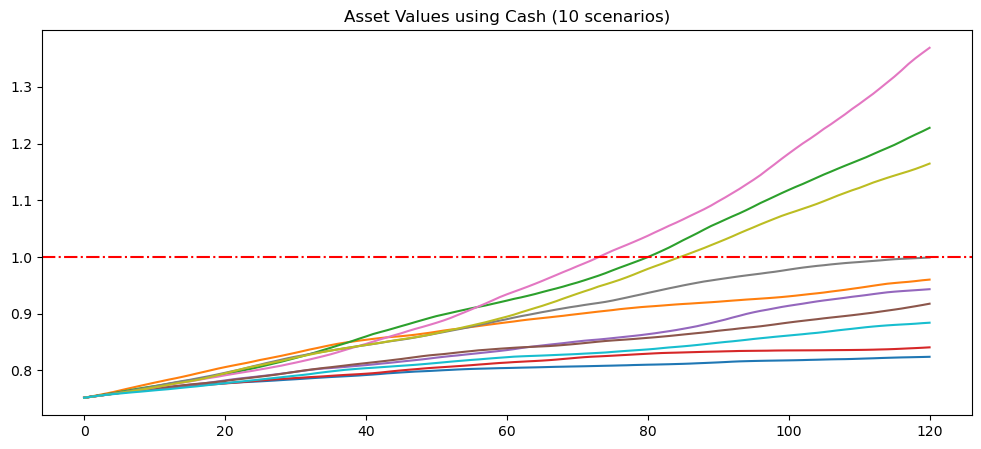

In [27]:
av_cash.plot(title='Asset Values using Cash (10 scenarios)', legend=False, figsize=(12,5))
plt.axhline(y=1, color='r', linestyle='-.')

Se invece eseguiamo un test sulle obbligazioni senza cedola vediamo che il risultato finale non è influenzato dal cambiamento dei tassi di interesse alla fine tutte le simulazioni convergono verso 1

<Axes: title={'center': 'Asset Values using ZC Bonds (10 scenarios)'}>

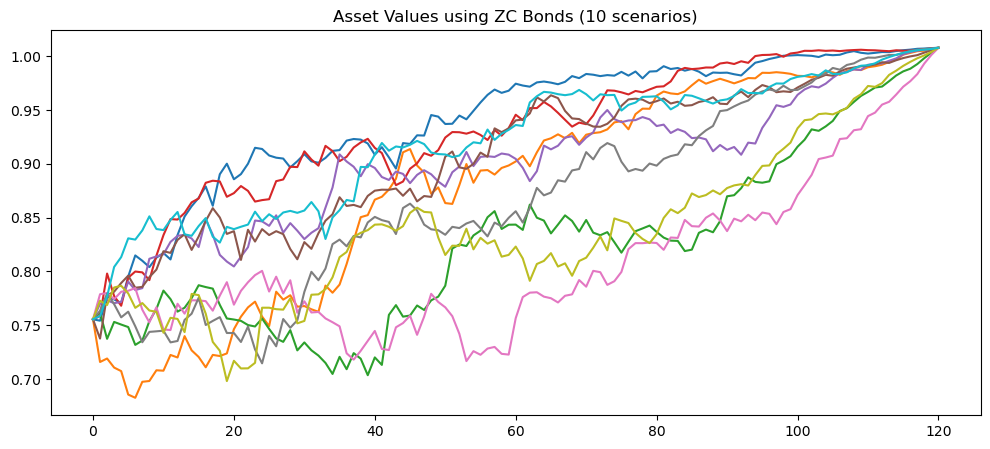

In [28]:
av_zc_bonds.plot(title='Asset Values using ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

Ragioniamo ora sui rendimenti dell'invetimento in denaro e in obbligazioni

<Axes: title={'center': 'Returns using Cash (10 scenarios)'}>

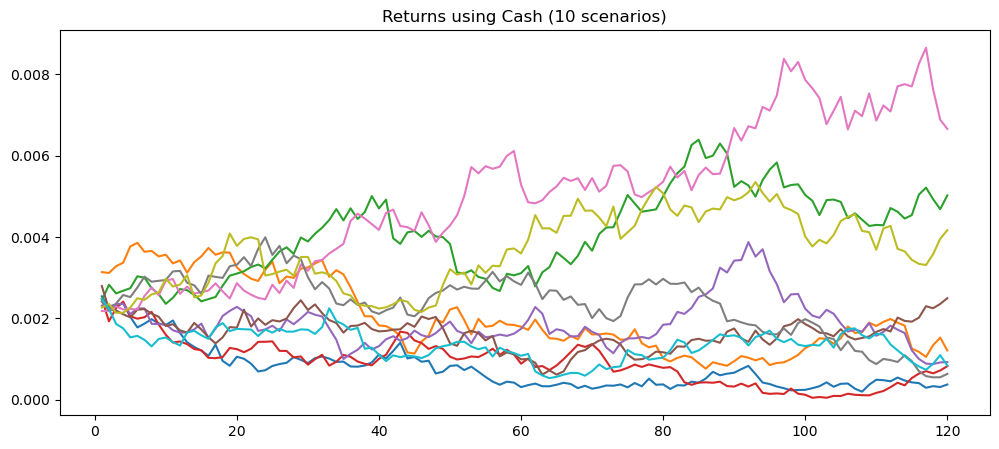

In [29]:
av_cash.pct_change().plot(title='Returns using Cash (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Returns using ZC Bonds (10 scenarios)'}>

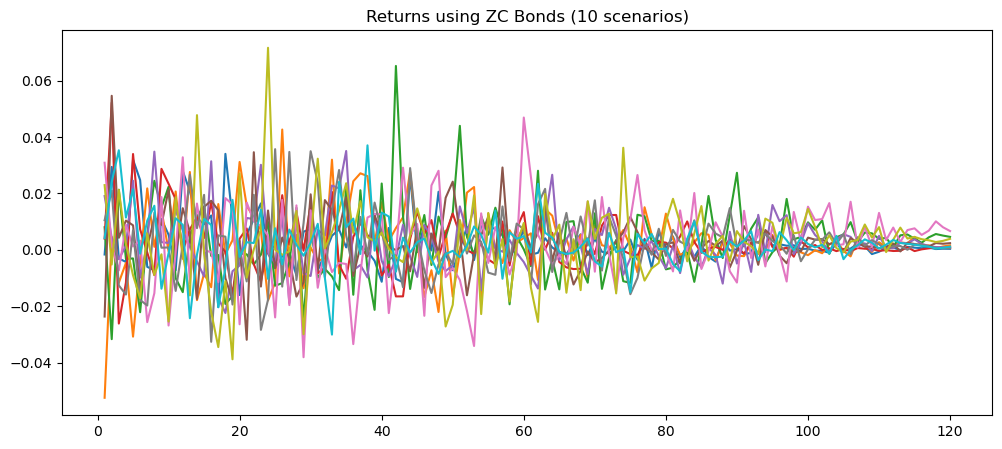

In [30]:
av_zc_bonds.pct_change().plot(title='Returns using ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

Vediamo anche in termini di founding ratio (rapporto tra attivo e passivo)

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 scenarios)'}>

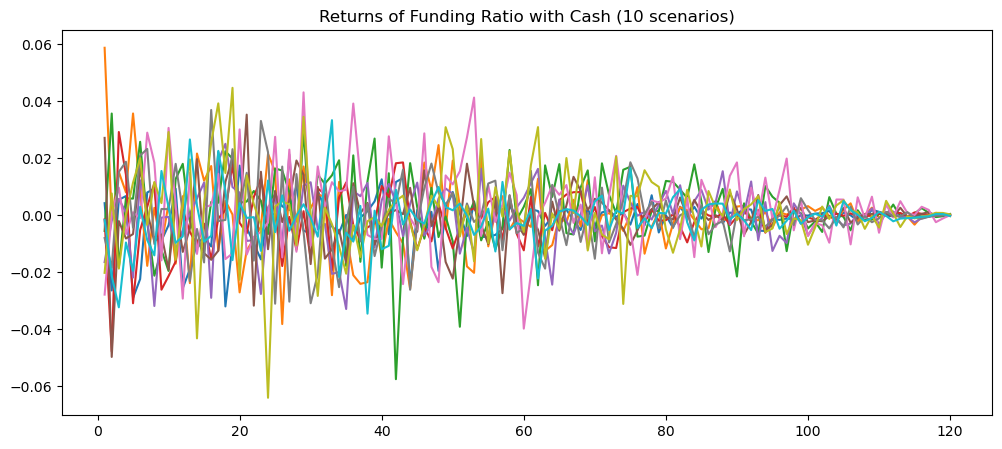

In [31]:
(av_cash/liabilities).pct_change().plot(title='Returns of Funding Ratio with Cash (10 scenarios)', legend=False, figsize=(12,5))

<Axes: title={'center': 'Returns of Funding Ratio with ZC Bonds (10 scenarios)'}>

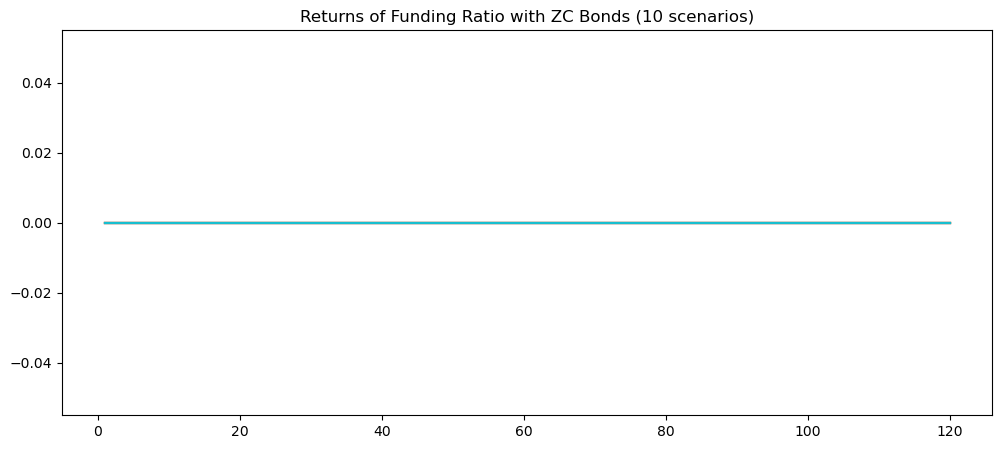

In [32]:
(av_zc_bonds/liabilities).pct_change().plot(title='Returns of Funding Ratio with ZC Bonds (10 scenarios)', legend=False, figsize=(12,5))

Vediamo che con le obbligazioni il rapporto è stabile, ed è essenzialmente quello che vogliamo avere, analizziamo la distribuzione finale dei valori del founding ratio. Vediamo che il dataframe cash ha un founding ratio finale varia tra un 0.75 non riesco a pagare i miei debiti e 2 pago molto bene i miei debiti

Mentre il dataframe ZC Bonds ha un valore finale del rapporto di founding ratio leggermente maggiore di 1

In [33]:
# my starting asset value today aka cash in hand
a_0 = 0.75
# simulate the next 10 years
rates, bond_prices = cir(r_0=0.03, b=0.03, n_scenarios=10000)
# liabilities are going to change over time to match the payoff of the ZCB
liabilities = bond_prices
# today's zero coupon bond price is the present value of 1 dollar in 10 years
zc_0 = pv(pd.Series(data=[1], index=[10]), 0.03)
# I can put my money in a zero coupon bond at today's price
n_bonds = a_0/zc_0
# and my asset value will grow based on the bond prices
av_zc_bonds = n_bonds*bond_prices
# how about if I invest in cash? It will grow at some rate of interest over time
av_cash = a_0*(rates/12+1).cumprod()

<Axes: >

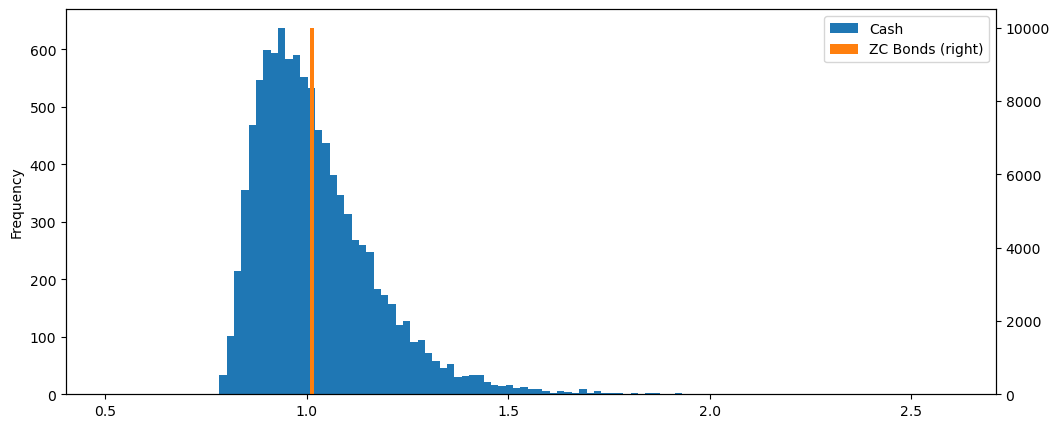

In [34]:
tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax = tfr_cash.plot.hist(label="Cash", figsize=(12,5), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax,label="ZC Bonds", bins=100, secondary_y=True, legend=True)

Come possiamo vedere gli investimenti in denaro possono avere dei risultati finali rischiosi, le obbligazioni senza cedola possono avare delle fluttuazioni importanti durante il percorso ma alla fine arrivano all'obiettivo.

Ovviamente abbiamo fatto due assunzioni per comodità:

* Abbiamo assunto di avere sempre una obbligazione disponibile per la data scadenza voluta
* Abbiamo beni inziali per poterci permettere la copertura

Cercheremo di superare questi due punti con i prossimi appunti

### Investimenti legati alla passività

La gestione legata alla passività è legata da due componenti fondamentali la prima è la ricerca delle **performance** che ci permettono di arrivare al nostro obiettivo con minore sforzo, il secondo è la **cautela** perchè i nostri assett possono sia aumentare che diminuire nel tempo.


Questi due obiettivi devono essere gestiti in due portafogli distinti:

* un PSP (Performance Seeking Portfolio) orientato sul rapporto rischio/premio efficiente
* un LHP (Liability Hedging Portfolio) orintato alla copertura dei fattori di rischio

Il modello formale di allocazione può essere dato dalla seguente formula:

$$
    max_w E\left[w\left(\frac{A_T}{L_T}\right)\right] \rightarrow w^* = \frac{\lambda_{psp}}{\gamma \sigma} w^{psp} + \beta(1-\frac{1}{\lambda})w^{lhp}
$$

Le componenti di questa formula sono:

* $\lambda$ (Psp Sharpe Ratio) se $\lambda$ = 0 nessun investimento in psp
* $\beta$ beta delle passività se $\beta$ = 0 nessun investimento in lhp
* $\sigma$ se $\sigma = \infty$ nessun investimento in psp
* $\gamma$ avversione al rischio se $\gamma = \infty$ nessun investimento in psp rappresenta semplicemente un grado di libertà

### Duration Matching

Non è sempre facile trovare obbligazioni a cedola zero che corrispondano fedelmente alle nostre passività. Possiamo fare la stessa cosa vista prima usando un portafoglio di normali obbligazioni a cedola.

Abbiamo bisgno di due pezzetti di codice il primo `bond_cash_flows` che genera i flussi di cassa della obbligazione

In [35]:
import math
def bond_cash_flows(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12):
    """
    Returns the series of cash flows generated by a bond,
    indexed by the payment/coupon number
    """
    n_coupons = round(maturity*coupons_per_year)
    coupon_amt = principal*coupon_rate/coupons_per_year
    coupon_times = np.arange(1, n_coupons+1)
    cash_flows = pd.Series(data=coupon_amt, index=coupon_times)
    cash_flows.iloc[-1] += principal # add the principal to the last payment
    return cash_flows

Supponiamo di investire un capitale di 1000€ (valore nominale dell'obbligazione) in una obbligazione decennale che paga una cedola semestrale del 5% il flusso di cassa di quella obbligazione sarà:

In [36]:
cash = bond_cash_flows(10,1000,0.05,2)
cash

1       25.0
2       25.0
3       25.0
4       25.0
5       25.0
6       25.0
7       25.0
8       25.0
9       25.0
10      25.0
11      25.0
12      25.0
13      25.0
14      25.0
15      25.0
16      25.0
17      25.0
18      25.0
19      25.0
20    1025.0
dtype: float64

Il ritorno del nostro investimento sarà pari a 

In [37]:
cash.sum()

1500.0

Quello però che dobbiamo fare è attualizzare quel flusso di cassa in quanto il debito che dobbiamo coprire segue l'andamento dei tassi di interesse.

Supponiamo che i tassi di interesse al momento siano al 3%

In [38]:
def bond_price(maturity, principal=100, coupon_rate=0.03, coupons_per_year=12, discount_rate=0.03):
    """
    Computes the price of a bond that pays regular coupons until maturity
    at which time the principal and the final coupon is returned
    This is not designed to be efficient, rather,
    it is to illustrate the underlying principle behind bond pricing!
    """
    cash_flows = bond_cash_flows(maturity, principal, coupon_rate, coupons_per_year)
    return pv(cash_flows, discount_rate/coupons_per_year)

In [39]:
bond_price(10,1000,0.05,2)

1171.6863878508211

ora vediamo come cambia il valore attualizzato del nostro investimento al variare dei tassi di interesse

<Axes: title={'center': 'Change in 10Y Bond Prices with Interest Rates'}>

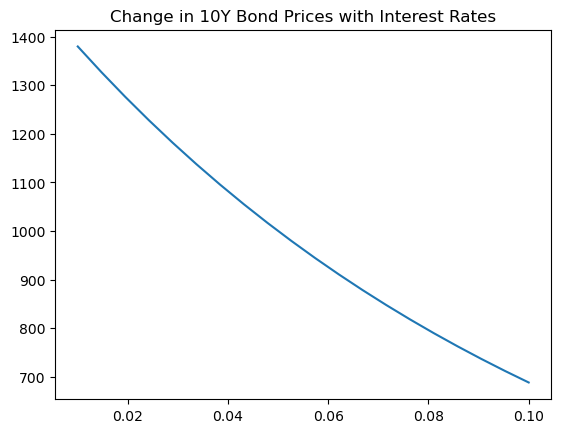

In [40]:
rates = np.linspace(.01, .10, num=20)
prices = [bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
pd.DataFrame(data=prices, index=rates).plot(title="Change in 10Y Bond Prices with Interest Rates", legend=False)

Come si vede quando i tassi di interesse superano quelli del nostro investimento il valore attualizzato scende sotto la soglia, con una pessima copertura. Quello che vogliamo fare è trovare una combinazione di obbligazioni che sia resiliente ai cambi di interesse come le obbligazioni senza cedola.

facciamo un esempio con una obbligazione triennale dal valore nominale di 1000€ con cedola al 6% e frazionamento semestrale avrò questi flussi di cassa

In [41]:
coupons_per_year = 2
coupon_rate = 0.06
cf = bond_cash_flows(3,1000,coupon_rate,coupons_per_year)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

applichiamo il fattore di sconto dei nostri flussi di cassa supponendo che il tasso attuale sia del 6% annuo i flussi di cassa scontati avranno questo valore

In [42]:
dcf = discount(cf.index, coupon_rate/2)*cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

Calcoliamo ora quanto ogni cedola pesa sul totale

In [43]:
weights = dcf / dcf.sum()
weights

1    0.029126
2    0.028278
3    0.027454
4    0.026655
5    0.025878
6    0.862609
dtype: float64

ora moltiplichiamo i pesi per gli indici e li sommiamo

In [44]:
(dcf.index * weights).sum()

5.579707187194534

questa è la media ponderata dei periodi, questo vuol dire che l'investimento viene si restituito in 6 periodi in realtà alcuni pagamenti vengono dati prima. Ora se i tassi di interesse cambiano cambia anche la durata della media ponderata, questa durata viene chiamata anche **Macaulay duration**. 

L'intuizione che sta dietro a questa formula è questa un cambio dei valori dei tassi di interesse influenzerà di più una obbligazione di lunga durata che una breve

In [45]:
def macaulay_duration(flows, discount_rate):
    """
    Computes the Macaulay Duration of a sequence of cash flows, given a per-period discount rate
    """
    discounted_flows = discount(flows.index, discount_rate)*flows
    weights = discounted_flows/discounted_flows.sum()
    return np.average(flows.index, weights=weights)

In [46]:
def show_maculay(maturity=3,coupon_rate=.03,discount_rate=.03,coupons_per_year=2):
    cash = bond_cash_flows(maturity,1000,coupon_rate,coupons_per_year)
    print(macaulay_duration(cash, discount_rate/coupons_per_year)/coupons_per_year)

In [47]:
controls = widgets.interactive(show_maculay,
                              maturity = (3, 20, 1),
                              coupon_rate = (0.1, 1, .1),
                              discount_rate = (0.1, 1, .1),
                              coupons_per_year = (1, 12, 1))
display(controls)

interactive(children=(IntSlider(value=3, description='maturity', max=20, min=3), FloatSlider(value=0.1, descri…

Ora abbiamo questo numero ma a cosa ci serve? se riusciamo a far corrispondere la Macaulay duration dei nostri debiti con la Macaulay duration delle nostre obbligazioni otteniamo che i due avranno la stessa sensibilità al cambio dei tassi di interesse, quandi proviamo a fare questo passaggio.

### Duration matching

Supponiamo di voler coprire due passività una da 100000€ fra 10 anni e una 100000€ fra 12 anni supponiamo che i tassi di interesse al momento siano del 4%, quale è la duration di questi debiti ?

In [48]:
liabilities = pd.Series(data = [100000, 100000], index=[10, 12])
macaulay_duration(liabilities, .04)

10.960799385088393

Ora se avessi una obbligazione a cedola zero con la durata di 10.96 anni sarebbe tutto perfetto, ma supponiamo di non averle e di avare solo due obbligazioni a disposizione:

* una obbligazione annuale di 10 anni al 5%
* una obbligazione annuale di 20 anni al 5%

In [49]:
md_10 = macaulay_duration(bond_cash_flows(10, 1000, .05, 1), .04)

In [50]:
md_20 = macaulay_duration(bond_cash_flows(20, 1000, .05, 1), .04)

In [51]:
md_10,md_20

(8.190898824083233, 13.544718122145921)

Ora quello che vogliamo ottenere è la combinazione di pesi $w_s$ e $w_l$ dei due investimenti la cui durata dia come risultato una duration di 10.96.
Impostiamo $w_l$ come $1-w_s$ avremo che:
$$ w_s \times 8.19 + (1-w_s) \times 13.54 = 10.96 $$
E piu in generale impostando le durate come:
$$ w_s \times d_s + (1-w_s) \times d_l = d_t $$
Raggruppiamo il tutto e otteniamo:
$$ w_s = \frac{d_l -d_t}{d_l - d_s} $$

Il tutto puo essere scritto come

In [52]:
def match_durations(cf_t, cf_s, cf_l, discount_rate):
    """
    Returns the weight W in cf_s that, along with (1-W) in cf_l will have an effective
    duration that matches cf_t
    """
    d_t = macaulay_duration(cf_t, discount_rate)
    d_s = macaulay_duration(cf_s, discount_rate)
    d_l = macaulay_duration(cf_l, discount_rate)
    return (d_l - d_t)/(d_l - d_s)

In [53]:
short_bond = bond_cash_flows(10, 1000, .05, 1)
long_bond = bond_cash_flows(20, 1000, .05, 1)
w_s = match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

0.48263092069478974

Deduciamo che per coprire la nostra passività dovremmo investire il 48% in obbligazioni a breve termine e il 52% in obbligazioni a lungo termine, facciamo questo calcolo impostando un capitale iniziale di 130000€

In [54]:
p_short = bond_price(10, 1000, .05, 1, 0.04)
p_long = bond_price(20, 1000, .05, 1, 0.04)

a_0 = 130000
dm_assets=pd.concat([a_0*w_s*short_bond/p_short,a_0*(1-w_s)*long_bond/p_long])
macaulay_duration(dm_assets, 0.04)

10.960799385088393

`dm_assets` rappresenta i flussi di cassa generati dalle due obbligazioni

In [55]:
dm_assets

1      2901.743586
2      2901.743586
3      2901.743586
4      2901.743586
5      2901.743586
6      2901.743586
7      2901.743586
8      2901.743586
9      2901.743586
10    60936.615315
1      2960.550536
2      2960.550536
3      2960.550536
4      2960.550536
5      2960.550536
6      2960.550536
7      2960.550536
8      2960.550536
9      2960.550536
10     2960.550536
11     2960.550536
12     2960.550536
13     2960.550536
14     2960.550536
15     2960.550536
16     2960.550536
17     2960.550536
18     2960.550536
19     2960.550536
20    62171.561257
dtype: float64

In [56]:
macaulay_duration(liabilities, 0.04)

10.960799385088393

Vediamo che con questa semplice formula siamo riusciti ad eseguire il match della duration usando una combinazione di obbligazioni a breve e lungo termine.

Vediamo ora il `funding_ratio` dobbiamo cambiare 

In [57]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of a series of liabilities, based on an interest rate and current value of assets
    """
    return pv(assets, r)/pv(liabilities, r)

In [58]:
cfr = funding_ratio(dm_assets, liabilities, 0.04)
cfr

0.9998760012192478

vediamo se questo rapporto cambia al variare dei tassi di interesse proviamo a vericare che i tassi di interesse dal 0% al 10% abbiamo sempre un funding ratio vicino a 1 proviamo sia la combinazione 100% obbligazione a breve termine sia 100% lungo termine sia il 48% e 52%

In [59]:
lb_assets = a_0*long_bond/p_long
funding_ratio(lb_assets, liabilities, 0.04)

0.9998760012192477

In [60]:
sb_assets = a_0*short_bond/p_short
funding_ratio(sb_assets, liabilities, 0.04)

0.9998760012192477

In [61]:
rates = np.linspace(0, .1, 20)
fr_change = pd.DataFrame({
    "Long Bond":[funding_ratio(lb_assets, liabilities, r) for r in rates],
    "Short Bond":[funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds":[funding_ratio(dm_assets, liabilities, r) for r in rates]
}, index=rates)
fr_change

,Long Bond,Short Bond,Duration Matched Bonds
0.000000,1.144464,0.901852,1.027372
0.005263,1.119809,0.913844,1.020404
0.010526,1.096992,0.926095,1.014512
0.015789,1.075935,0.938613,1.009659
0.021053,1.056570,0.951405,1.005814
0.026316,1.038829,0.964481,1.002946
0.031579,1.022651,0.977851,1.001029
0.036842,1.007979,0.991523,1.000037
0.042105,0.994759,1.005508,0.999947
0.047368,0.982943,1.019815,1.000739


<Axes: title={'center': 'Change in Funding Ratio'}>

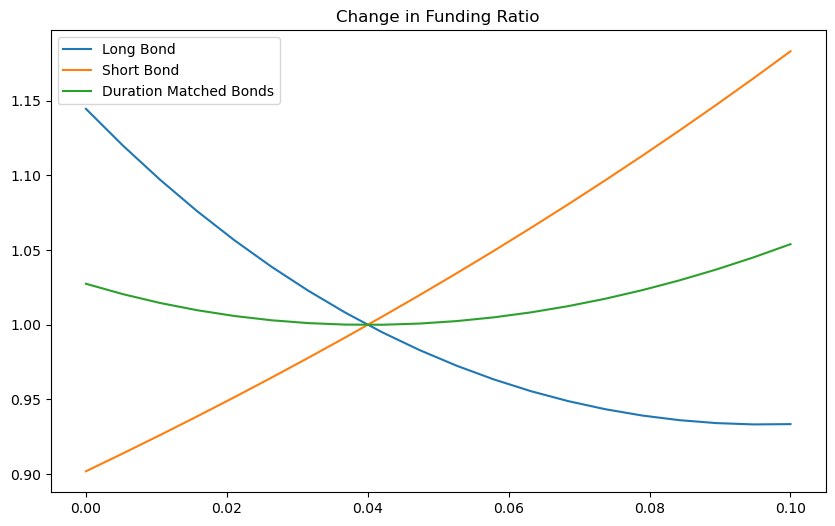

In [62]:
fr_change.plot(title='Change in Funding Ratio', figsize=(10,6))

Si nota subito che le strategie di investimento su obbligazioni a lungo termine e breve termine sono particolarmente sensibili al variare dei tassi di interesse, la linea verde invece riesce a tenere un Funding ratio vicino a 1

## Scelta della strategia di portafoglio

Come abbiamo descritto prima dobbiamo trovare una combinazione perfetta tra portafoglio orientato alle performance e porfafoglio orientato alla copertura.

Ma quanto allocare nel portafoglio PSP equanto allocare in LHP?

La teoria vuole che questo sia deciso in funzione del parametro di avvesrione al rishio $\gamma$. Ora il problema è che $\gamma$ non è osservabile. Lasciamolo dunque come parametro libero proveremo più combinazioni come 60/40, 80/20 ecc ecc

Nella pratica gli investirori tendono a investire nel portafoglio PSP il massimo che possono pur non superando il rischio di budget. Ci sono dei problemi sul breve e lungo termine nel lungo termine cerco le performance nel breve non voglio trovarmi a essere sotto finanziato. 

In altre parole ci troviamo di fronte ad un conflitto tra denaro e rischio di budget, cio significa che se abbiamo pochi fondi non saremo in grado di generare grandi rialzi.

## Simulazione dei prezzi di obbligazione con cedola

Il nostro obiettivo è quello di simulare migliaia di tecniche diverse di costruzione del portafoglio.
Cominciamo con il combinare la funzione di sconto `discount` per lavorare con valori multipli di r (vettorizzazione).

In [63]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays a dollar at time period t
    and r is the per-period interest rate
    returns a |t| x |r| Series or DataFrame
    r can be a float, Series or DataFrame
    returns a DataFrame indexed by t
    """
    discounts = pd.DataFrame([(r+1)**-i for i in t])
    discounts.index = t
    return discounts

cambiamo anche la funzione `pv` sempre per avere la possibilità di lavorare vettorialmente

In [64]:
def pv(flows, r):
    """
    Compute the present value of a sequence of cash flows given by the time (as an index) and amounts
    r can be a scalar, or a Series or DataFrame with the number of rows matching the num of rows in flows
    """
    dates = flows.index
    discounts = discount(dates, r)
    return discounts.multiply(flows, axis='rows').sum()

Questo si riperquote anche sulle altre funzioni già modificate nella libreria proviamo adesso a simulare il prezzo di una obbligazione scontata del valore nominale di 100€ mettiamo un tasso di cedola del 0.05 con cedola mensile:

In [65]:
bond_price(5,100,.05,12, .03)

0    109.275393
dtype: float64

Il prezzo è ancora maggiore in quanto i tassi di interesse sono più bassi del tasso di cedola, alziamo un pochino i tassi e vediamo cosa succede:

In [66]:
bond_price(5,100,.05,12,.032)

0    108.306703
dtype: float64

Si vede che il prezzo della nostra obbligazione si è abbassato, dovremmo poter fare questo per molti più casi usando il modello CIR visto prima. Teniamo sempre il 3%

In [67]:
from simulation import cir
from bond import bond_price, bond_total_return
from risk import annualize_rets,summary_stats

rates, zc_prices = cir(10, 500, b=0.03, r_0 = 0.03)

All'inizio $t_0$ ovviamente il prezzo delle obbligazioni è uguale in tutti i casi

In [68]:
bond_price(5,100,.05,12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [69]:
rates.iloc[0][[1,2,3]]

1    0.03
2    0.03
3    0.03
Name: 0, dtype: float64

Procediamo al passo $t_1$ e vediamo che il discorso cambia i prezzi iniziano a divergere

In [70]:
bond_price(5,100,.05,12, rates.iloc[1][[1,2,3]])

1    109.260305
2    109.427725
3    108.583608
dtype: float64

Iniziamo la parte più complicata ovvero simuliamo il prezzo delle obbligazioni al variare dei tassi di interesse

<Axes: >

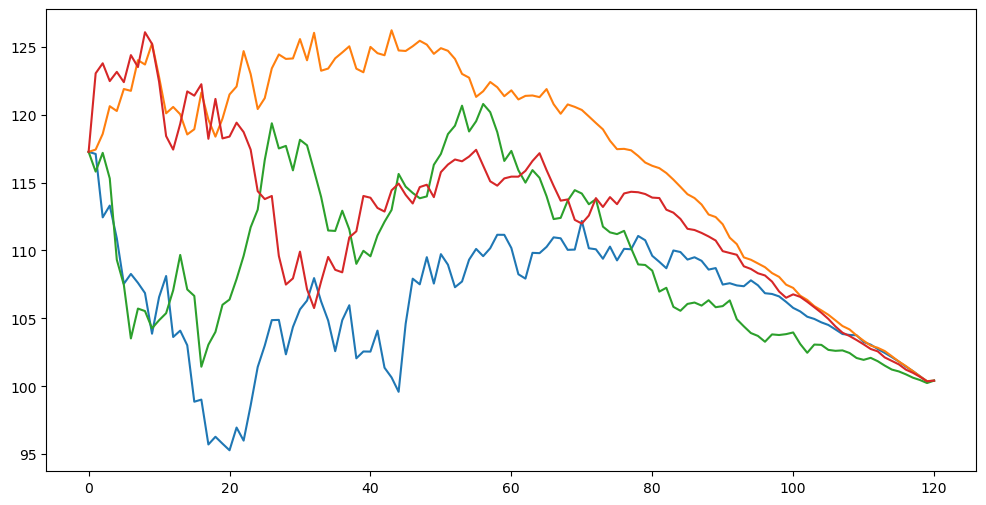

In [71]:
bond_price(10, 100, .05, 12, rates[[1,2,3,4]]).plot(legend=False, figsize=(12,6))

Ora avendo queste simulazioni come facciamo a calcolare il redimento di una obbligazione? Calcoliamo i prezzi e usiamo le funzioni viste nella prima lezione

In [72]:
prices = bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
prices.head()

,1,2,3,4
0,117.260292,117.260292,117.260292,117.260292
1,117.107697,117.430593,115.807508,123.044658
2,112.439282,118.5829,117.188301,123.782783
3,113.307137,120.623282,115.304406,122.471419
4,110.893965,120.268581,109.31859,123.150784


In [73]:
br = prices.pct_change().dropna()
annualize_rets(br, 12)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
dtype: float64

Ma come si vede il rendimento di queste obboigazioni è negativo !! come può essese abbiamo una cedola mensile non ha senso... 
Infatti qui lavoriamo solo sul prezzo finale della obbligazione ci siamo dimenticati di includere le cedole lungo il percorso aggiungiamo questi valori e ricalcoliamo il tutto

In [74]:
p = bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = bond_total_return(p, 100, .05, 12)
annualize_rets(btr, 12)

1    0.032121
2    0.027695
3     0.03065
4    0.029367
dtype: object

Possiamo tirare un sospiro di sollievo finalmente i conti tornano.
Ora che abbiamo tutto possiamo unire le cose e possiamo iniziare a pensare di testare le varie strategie di allocazione.
Cominciamo con il calcolare il prezzo della obbligazione a 10 anni con cedola mensile al 5%

In [75]:
price_10 = bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.446173,101.490668,100.880305
117,101.118868,101.110466,100.632709
118,100.7399,100.73208,100.461321
119,100.361787,100.381618,100.239722
120,100.416667,100.416667,100.416667


Inseriamo anche nel nostro portafoglio una obbligazione a 30 anni con le stesse caratteritiche

In [76]:
price_30 = bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,182.681559,186.337869,142.881627
117,186.07129,185.145541,140.502478
118,184.718864,183.440889,145.071625
119,181.713701,188.222969,147.105896
120,181.329086,186.697598,148.753252


Calcoliamo i rendimenti di queste obbligazioni

In [77]:
rets_30 = bond_total_return(price_30, 100, .05, 12)
rets_10 = bond_total_return(price_10, 100, .05, 12)

Assimiamo inoltre di investire il 60% in obbligazioni a 10 anni e il 40% in obbligazioni a 30 anni ribilanciando mensilmente, abbiamo 500 casi di test per valutare il rendimento prendiamo la media dei casi

In [78]:
rets_bonds = .6*rets_10 + .4*rets_30
mean_rets_bonds = rets_bonds.mean(axis='columns')

In [79]:
summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.034962,0.00347,0.341416,0.427462,-0.001275,-0.001004,1.391778,0.0


Esaminiamo ora il nostro portafoglio PSP azionario generiamo anche in questo caso 500 scenari

In [81]:
from simulation import gbm
price_eq = gbm(n_years=10,n_scenarios=500,mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()

Controlliamo anche che le dimensioni delle matrici siano uguali

In [82]:
rets_eq.shape,rets_bonds.shape

((120, 500), (120, 500))

Anche in questo caso impostiamo un portafoglio con il 70% di azionariato e il 30% in oggligazioni vediamo il comportamento di questo portafoglio  

In [84]:
rets = .70*rets_eq + 0.3*rets_bonds
rets_mean = rets.mean(axis='columns')
summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.058919,0.004045,0.161692,0.285689,-0.002861,-0.00243,6.958877,0.0


Ora come vedete il nostro compito sarà quello di trovare una allocazione per soddisfare al meglio il nostro obiettivo.